# Week 2 - Theory of Constrained Optimization
First and second order optimality conditions and how to apply them to determine the minimizers of constrained optimization problems.

## Exercise 1 - Quadratic Optimization
Consider the problem
$$
\begin{array}{ll}
\min _x & f(x)=3 x_1^2+2 x_1 x_2+x_1 x_3+2.5 x_2^2+2 x_2 x_3+2 x_3^2-8 x_1-3 x_2-3 x_3 \\
\text { s.t. } & x_1+x_3=3 \\
& x_2+x_3=0
\end{array}
$$

### 1.1.1 - Write the constraints in the form $c_i(x)=0$.

$$
c(x) =
\begin{bmatrix}
    c_1(x) \\
    c_2(x)
\end{bmatrix}
=
\begin{bmatrix}
    x_1 + x_3 - 3 \\
    x_2 + x_3
\end{bmatrix}
=
\begin{bmatrix}
    0 \\
    0
\end{bmatrix}
$$

### 1.1.2 Write the Lagrangian of this problem.

$$
\mathcal{L}(x, \mu)=f(x)-\mu^{T} c(x) =
f(x) - 
\begin{bmatrix} \mu_1 & \mu_2 \end{bmatrix}
\begin{bmatrix}
    c_1(x) \\
    c_2(x)
\end{bmatrix}
=
f(x) - \mu_1 c_1(x) - \mu_2 c_2(x)
$$

### 1.1.3 Write the first order optimality conditions for this problem.

First Order optimality conditions:
$$
\begin{aligned}
& \nabla_x L(x, \mu)=\nabla f(x)-\nabla c(x) \mu=0 \\
& c(x)=0
\end{aligned}
$$



$$
\nabla f(x) = 
\begin{bmatrix}
    6x_1 + 2x_2 + x_3 - 8 \\
    2x_1 + 5x_2 + 2x_3 - 3 \\
    x_1 + 2x_2 + 4x_3 - 3
\end{bmatrix}
$$
and
$$
\nabla c(x) =
\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
    1 & 1
\end{bmatrix}
$$

Therefore the first order optimality (KKT) conditions are:

$$
\nabla_x L(x,\mu) = 
\begin{bmatrix}
    6x_1 + 2x_2 + x_3 - 8 - \mu_1 \\
    2x_1 + 5x_2 + 2x_3 - 3 - \mu_2 \\
    x_1 + 2x_2 + 4x_3 - 3 - \mu_1 - \mu_2
\end{bmatrix}
=
\begin{bmatrix}
    0 \\
    0 \\
    0
\end{bmatrix}
$$
and
$$
c(x) =
\begin{bmatrix}
    x_1 + x_3 - 3 \\
    x_2 + x_3
\end{bmatrix}
=
\begin{bmatrix}
    0 \\
    0
\end{bmatrix}
$$    

### 1.1.4 Find the optimal solution

In [1]:
from sympy import Eq, solve, symbols

# Redefine symbols for clarity in this context
x1, x2, x3, mu1, mu2 = symbols('x1 x2 x3 mu1 mu2')

# Define equations based on the given optimality conditions and constraints
eq1 = Eq(6*x1 + 2*x2 + x3 - 8 - mu1, 0)
eq2 = Eq(2*x1 + 5*x2 + 2*x3 - 3 - mu2, 0)
eq3 = Eq(x1 + 2*x2 + 4*x3 - 3 - mu1 - mu2, 0)
eq4 = Eq(x1 + x3 - 3, 0)
eq5 = Eq(x2 + x3, 0)

# Solve the system of equations
solution = solve((eq1, eq2, eq3, eq4, eq5), (x1, x2, x3, mu1, mu2))

solution


{mu1: 3, mu2: -2, x1: 2, x2: -1, x3: 1}

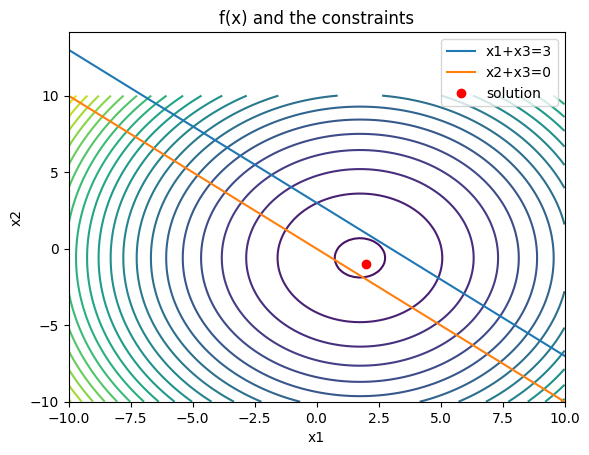

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 3*x[0]**2 + 2*x[0]*x[1] + x[0]*x[2] + 2.5*x[1]**2 + 2*x[1]*x[2] + 2*x[2]**2 - 8*x[0] - 3*x[1] - 3*x[2]

def c(x):
    return np.array([x[0]+x[2]-3, x[1]+x[2]])

#plot f and the constraints c
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
X, Y = np.meshgrid(x, y)
Z = f([X,Y,3-X])
plt.contour(X, Y, Z, 20)
plt.plot(x, 3-x, label='x1+x3=3')
plt.plot(x, -x, label='x2+x3=0')

#plot the solution
plt.plot(solution[x1], solution[x2], 'ro', label='solution')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('f(x) and the constraints')
plt.legend()
plt.show()

### 1.2.1 - Quadratic Form
Write the problem in the form
\begin{align*}
\begin{array}{ll}
\min _x & f(x)=\frac{1}{2} x^{T} H x+g^{T} x \\
\text { s.t. } & A^{T} x=b
\end{array}
\end{align*}

The Hessian $H$:

\begin{array}{rl}
f: \mathbb{R}^n \mapsto \mathbb{R} & f=f(x) \\
\nabla_x f & =\left[\begin{array}{c}
\frac{\partial f}{\partial x_1} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{array}\right] \\
\nabla_{x x}^2 f & =\nabla_x\left(\nabla_x f\right)=\left[\begin{array}{lll}
\nabla_x\left(\frac{\partial f}{\partial x_1}\right) & \cdots & \nabla_x\left(\frac{\partial f}{\partial x_n}\right)
\end{array}\right] \\
& =\left[\begin{array}{ccc}
\frac{\partial}{\partial x_1}\left(\frac{\partial f}{\partial x_1}\right) & \cdots & \frac{\partial}{\partial x_1}\left(\frac{\partial f}{\partial x_n}\right) \\
\vdots & & \vdots \\
\frac{\partial}{\partial x_n}\left(\frac{\partial f}{\partial x_1}\right) & \cdots & \frac{\partial}{\partial x_n}\left(\frac{\partial f}{\partial x_n}\right)
\end{array}\right]=\left[\begin{array}{ccc}
\frac{\partial^2 f}{\partial x_1 \partial x_1} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\vdots & & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \cdots & \frac{\partial^2 f}{\partial x_n \partial x_n}
\end{array}\right]
\end{array}

so

$$
H =
\nabla^2 f(x) =
\begin{bmatrix}
    6 & 2 & 1 \\
    2 & 5 & 2 \\
    1 & 2 & 4
\end{bmatrix}
$$

and then we have:

$$
g = 
\begin{bmatrix}
    - 8 \\
    -3 \\
    -3
\end{bmatrix}
$$

and for the constraints

$$
A =
\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
    1 & 1
\end{bmatrix}
\;\;
\text{ and }
\;\;
b =
\begin{bmatrix}
    3 \\
    0
\end{bmatrix}
$$

All together this gives:

\begin{align*}
\begin{array}{ll}
\min _x & f(x)=
    \frac{1}{2} 
    \begin{bmatrix}
        x1 & x2 & x3
    \end{bmatrix}
    \begin{bmatrix}
        6 & 2 & 1 \\
        2 & 5 & 2 \\
        1 & 2 & 4
    \end{bmatrix}
    \begin{bmatrix}
        x1 \\
        x2 \\
        x3
    \end{bmatrix}
    +
    \begin{bmatrix} 
        -8 & -3 & -3
    \end{bmatrix}
    \begin{bmatrix}
        x1 \\
        x2 \\
        x3
    \end{bmatrix}
     \\
\text { s.t. } & 
\begin{bmatrix} 
    1 & 0 & 1 \\
    0 & 1 & 1
\end{bmatrix}
\begin{bmatrix}
    x1 \\
    x2 \\
    x3
\end{bmatrix}
=
\begin{bmatrix}
    3 \\
    0
\end{bmatrix}
\end{array}
\end{align*}

### 1.2.2 - Describe $H, g, A, \text{ and } b$
* $H$ is the Hessian of $f$
* $g$ is the gradient vector, containing the linear term coefficients, which can be read from $f$
* $A$ is the constraint coefficient matrix
* $b$ is the right-hand-side constraint vector, containing the constant terms of the constraints

### 1.2.3 -  Write the Lagrangian

Generally we define the Lagrangian as
$$
\mathcal{L}(x, \lambda)=\frac{1}{2} x^{T} H x+g^{T} x+\lambda^{T}\left(b-A^{t} x\right)
$$
that means for this system we have
$$
\mathcal{L}(x, \lambda)=\frac{1}{2} x^{T} 
\begin{bmatrix}
    6 & 2 & 1 \\
    2 & 5 & 2 \\
    1 & 2 & 4
\end{bmatrix}
x+
\begin{bmatrix} 
    -8 & -3 & -3
\end{bmatrix}
x+\lambda^{T}\left(
    \begin{bmatrix}
        3 \\
        0
    \end{bmatrix}
    -
    \begin{bmatrix} 
        1 & 0 & 1 \\
        0 & 1 & 1
    \end{bmatrix}
    x
\right)
$$

### 1.2.3 - Use the first order optimality conditions

The general first order optimality conditions are:
$$
\begin{aligned}
& \nabla_x \mathcal{L}(x, \lambda)=H x+g-A \lambda=0 \\
& \nabla_y \mathcal{L}(x, \lambda)=-\left(A^{\prime} x-b\right)=0
\end{aligned}
$$

and so for this system the first order optimality conditions are:
$$
\begin{aligned}
&\nabla_x \mathcal{L}(x, \lambda) = 
\begin{bmatrix}
    6 & 2 & 1 \\
    2 & 5 & 2 \\
    1 & 2 & 4
\end{bmatrix}
x
+
\begin{bmatrix} 
    -8 \\
    -3 \\
    -3
\end{bmatrix}
-
\begin{bmatrix} 
    1 & 0 \\
    0 & 1 \\
    1 & 1
\end{bmatrix}
\lambda
= 0 \\
&\nabla_y \mathcal{L}(x, \lambda) = - \left(
    \begin{bmatrix} 
        1 & 0 & 1 \\
        0 & 1 & 1
    \end{bmatrix}
    x
    -
    \begin{bmatrix}
        3 \\
        0
    \end{bmatrix}
 \right)
 = 0
\end{aligned}
$$

### 1.2.4 - Find the minimizer using these optimality conditions

In [3]:
from sympy import Matrix, symbols, solve

# Define symbols for x and lambda
x1, x2, x3, lambda1, lambda2 = symbols('x1 x2 x3 lambda1 lambda2')

# Define matrices and vectors
H = Matrix([[6, 2, 1], [2, 5, 2], [1, 2, 4]])
g = Matrix([-8, -3, -3])
A = Matrix([[1, 0, 1], [0, 1, 1]])
b = Matrix([3, 0])
lambda_vector = Matrix([lambda1, lambda2])

# System of equations from the first order conditions
# Hx + g - A.T*lambda = 0 and Ax - b = 0
eq1 = H*Matrix([x1, x2, x3]) + g - A.T*lambda_vector
eq2 = A*Matrix([x1, x2, x3]) - b

# Solve the system
solution = solve((eq1, eq2), (x1, x2, x3, lambda1, lambda2))

solution


{lambda1: 3, lambda2: -2, x1: 2, x2: -1, x3: 1}

### 1.2.5 - Use sufficient conditions to prove that the point found is a minimizer

We can see that $H = \nabla^2 f(x) > 0$ is true since $H$ is positive definite

For $\nabla f(x) = 0$ we can evaluate the solution in the gradient.

In [4]:
import numpy as np

# Define the solution and Lagrange multipliers
x_star = np.array([2, -1, 1])
lambda_star = np.array([3, -2])

# Define the gradient of the objective function
g = np.array([6*x_star[0] + 2*x_star[1] + x_star[2] - 8,
              2*x_star[0] + 5*x_star[1] + 2*x_star[2] - 3,
              x_star[0] + 2*x_star[1] + 4*x_star[2] - 3])

# Define the Hessian matrix of the objective function
H = np.array([[6, 2, 1], [2, 5, 2], [1, 2, 4]])

# Define the constraint functions and their gradients
constraints = [
    lambda x: x[0] + x[2] - 3,  # x1 + x3 = 3
    lambda x: x[1] + x[2],      # x2 + x3 = 0
]
constraint_gradients = np.array([
    [1, 0, 1],
    [0, 1, 1],
])
# Check 1 1st order optimality conditions (KKT conditions)
# Check gradient of Lagranian equal to 0
gradient_lagrangian = g - constraint_gradients.T @ lambda_star
kkt_conditions_satisfied = np.all(gradient_lagrangian == 0)


# Check all constraints are 0 at the solution using numpy
constraint_values = np.array([c(x_star) for c in constraints])
all_constraints_satisfied = np.all(constraint_values == 0)

# Check 2: Linear Constraint Qualification (gradients of active constraints are linearly independent)
# For simplicity, check if the matrix of gradients has full rank
A = np.vstack(constraint_gradients) 
lcq = np.linalg.matrix_rank(A) == len(constraint_gradients)

# Check 3: Strong activity of active constraints (Lagrange multipliers are non-zero)
strong_activity = all(lambda_i != 0 for lambda_i in lambda_star)

# Check 4: Positive definiteness of the Hessian in any feasible direction h
# A simple way to check positive definiteness is to ensure all eigenvalues of H are positive
eigenvalues = np.linalg.eigvals(H)
positive_definite = np.all(eigenvalues > 0)

# Output the checks
print("First Order Optimality Conditions (KKT Conditions)")
print("---------------------------------")
print(f"KKT Conditions Satisfied: {kkt_conditions_satisfied}")
print(f"All equality constraints are satisfied at the solution: {all_constraints_satisfied}")
print("---------------------------------")
print(f"Linear Constraint Qualification Satisfied: {lcq}")
print(f"Strong Activity of Active Constraints: {strong_activity}")
print(f"Positive Definiteness of Hessian: {positive_definite}")


First Order Optimality Conditions (KKT Conditions)
---------------------------------
KKT Conditions Satisfied: True
All equality constraints are satisfied at the solution: True
---------------------------------
Linear Constraint Qualification Satisfied: True
Strong Activity of Active Constraints: True
Positive Definiteness of Hessian: True


Based on the checks above we see that all sufficient conditions are fullfilled and so the solution is a minimizer.

## Exercise 2 - Linear Optimization
We consider the problem
\begin{align*}
\begin{array}{ll}
\min _{x \in \mathbb{R}^2} & f(x)=g^{T} x \\
\text { s.t. } & c(x)=A^{T} x-b \geq 0
\end{array}
\end{align*}
with
\begin{align*}
\begin{aligned}
g & =\left[\begin{array}{cc}
1 & -2
\end{array}\right]^{T} \\
A & =\left[\begin{array}{ccccc}
1 & 0 & 1 & 1 & -5 \\
0 & 1 & -1 & -5 & 1
\end{array}\right] \\
b & =\left[\begin{array}{lllll}
0 & 0 & -2 & -20 & -15
\end{array}\right]^{T}
\end{aligned}
\end{align*}

### 2.1 - Contour Plot
Draw a contour plot of the problem

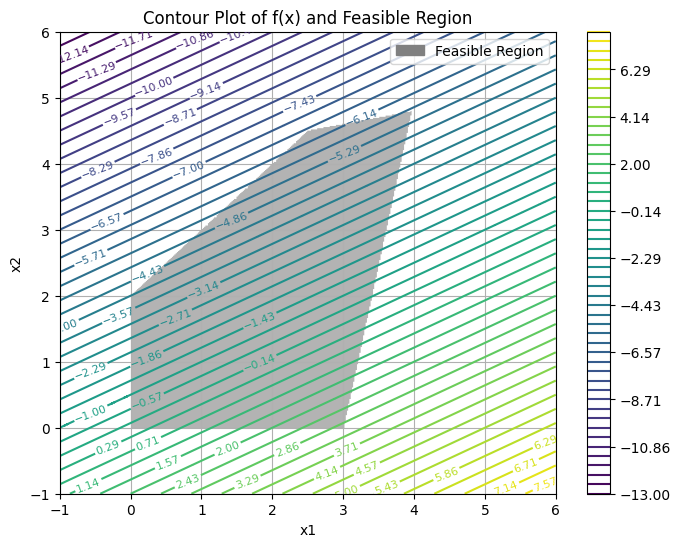

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the function f(x) = g^T x
def f(x, g):
    return np.dot(g.T, x)

# Define the constraints c(x) = A^T x - b
def c(x, A, b):
    return np.dot(A.T, x) - b

# Given vectors and matrices
g = np.array([1, -2])
A = np.array([[1, 0, 1, 1, -5], [0, 1, -1, -5, 1]])
b = np.array([0, 0, -2, -20, -15])

# Create a meshgrid for the x values
x1 = np.linspace(-1, 6, 400)
x2 = np.linspace(-1, 6, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros(X1.shape)

# Evaluate f(x) over the grid
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        x = np.array([X1[i, j], X2[i, j]])
        Z[i, j] = f(x, g)

# Evaluate constraints and find the feasible region
feasible = np.ones(X1.shape, dtype=bool)
for i in range(A.shape[1]):
    for j in range(X1.shape[0]):
        for k in range(X1.shape[1]):
            x = np.array([X1[j, k], X2[j, k]])
            if c(x, A[:, i:i+1], b[i]) < 0:
                feasible[j, k] = False

# Plotting
plt.figure(figsize=(8, 6))

# Adjust contour levels to improve visibility around zero
levels = np.linspace(Z.min(), Z.max(), 50)  # More uniform distribution of levels
contour = plt.contour(X1, X2, Z, levels=levels)
plt.clabel(contour, inline=True, fontsize=8)

plt.imshow(feasible, extent=(x1.min(), x1.max(), x2.min(), x2.max()), origin='lower', alpha=0.3, cmap='Greys', aspect='auto')

# Create a custom legend for the feasible region
grey_patch = mpatches.Patch(color='grey', label='Feasible Region')
plt.legend(handles=[grey_patch])

plt.colorbar(contour)
plt.title('Contour Plot of f(x) and Feasible Region')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()


### 2.2 - Minimizer in Contour Plot
Minimizer seems to be around {x1: 2.5, x2: 4.5}

### 2.3 - Lagrange Function
Write the Lagrange function

$$
\begin{aligned}
\mathcal{L}(x,\lambda) &= f(x) - \lambda^T c(x) \\
&= 
g^T x - \lambda^T (A^T x - b) \\
&=
\begin{bmatrix} 1 & -2 \end{bmatrix}
\begin{bmatrix}
    x_1 \\
    x_2
\end{bmatrix}
- \lambda^T
\left(
\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
    1 & -1 \\
    1 & -5 \\
    -5 & 1
\end{bmatrix}
\begin{bmatrix}
    x_1 \\
    x_2
\end{bmatrix}
-
\begin{bmatrix}
    0 \\
    0 \\
    -2 \\
    -20 \\
    -15
\end{bmatrix}
\right)\\
&=

x_1 - 2x_2 - \lambda_1 x_1 - \lambda_2 x_2 - \lambda_3 (x_1 - 5x_2 - 2) - \lambda_4(x_1 - 5x_2 - 20) - \lambda_5(-5x_1 + x_2 -15)

\end{aligned}
$$

### 2.4 - KKT Conditions
Write the first-order optimality conditions

$\nabla c_i(x)$ linear indep. $\forall i \in \mathcal{A}(x)$

$$
\begin{align*}
\begin{aligned}
& \nabla f(x)- \lambda^T \nabla c(x)=0 \\
& c_i(x)=0 \quad i \in \mathcal{E} \\
& c_i(x) \geq 0 \quad i \in \mathcal{I} \\
& \lambda_i \geq 0 \quad i \in \mathcal{I} \\
& \lambda_i c_i(x)=0 \quad i \in \mathcal{I}
\end{aligned}
\end{align*}
$$

Where
$$
\nabla c(x)=\left[\begin{array}{lll}
\nabla c_1(x) & \ldots & \nabla c_m(x)
\end{array}\right]=\left[\begin{array}{ccc}
\frac{\partial c_1}{\partial x_1}(x) & \ldots & \frac{\partial c_m}{\partial x_1}(x) \\
\vdots & & \vdots \\
\frac{\partial c_1}{\partial x_n}(x) & \ldots & \frac{\partial c_m}{\partial x_n}(x)
\end{array}\right]
$$

The gradient is:

$$
\nabla f(x) = g = 
\begin{bmatrix}
    1 \\
    -2
\end{bmatrix}
$$

The gradient of the constraints is:

$$
\nabla c(x) = A^T =
\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
    1 & -1 \\
    1 & -5 \\
    -5 & 1
\end{bmatrix}
$$


That means we have the constraints:

$$
\begin{align}
    \begin{bmatrix}
        1 \\
        -2
    \end{bmatrix}
    -
    \lambda^T
    \begin{bmatrix}
        1 & 0 \\
        0 & 1 \\
        1 & -1 \\
        1 & -5 \\
        -5 & 1
    \end{bmatrix}
    = 0

\end{align}
$$

We do not have any equality constraints, but we still have:

$$
\begin{align*}
\begin{aligned}
& c_i(x) \geq 0 \quad i \in \mathcal{I} \\
& \lambda_i \geq 0 \quad i \in \mathcal{I} \\
& \lambda_i c_i(x)=0 \quad i \in \mathcal{I}
\end{aligned}
\end{align*}
$$

### 2.5 - Active Set Method
Write the equations to solve using the active set method. Use the contour plot to
determine the active set

The **Active Set Algorithm**

Solve the following systems of equations for different guesses of
the active set
$$
\left[\begin{array}{c}
\nabla f(x)-\nabla c(x) \lambda_{\mathcal{A}} \\
-c(x)
\end{array}\right]=\left[\begin{array}{l}
0 \\
0
\end{array}\right]
$$

Based on the previous exercises the systems of equations is:

$$
\begin{bmatrix}
    1 - \lambda_1 - \lambda_3 - \lambda_4 + 5\lambda_5 \\
    -2 - \lambda_2 + \lambda_3 + 5\lambda_4 - \lambda_5 \\
    -x_1 \\
    -x_2 \\
    -x_1 + x_2 - 2 \\
    -x_1 + 5x_2 - 20 \\
    5x_1 - x_2 - 15
\end{bmatrix}
=
\begin{bmatrix}
    0 \\
    0 \\
    0 \\
    0 \\
    0 \\
    0 \\
    0
\end{bmatrix}
$$

If we look at the feasible region on the contour plot, we see that the constraints around the minimizer are the 3rd and 4th constraints, so

$$
\begin{bmatrix}
    1 - \lambda_3 - \lambda_4 \\
    -2 + \lambda_3 + 5\lambda_4 \\
    -x_1 + x_2 - 2 \\
    -x_1 + 5x_2 - 20 \\
\end{bmatrix}
=
\begin{bmatrix}
    0 \\
    0 \\
    0 \\
    0 \\
\end{bmatrix}
$$

In [12]:
import sympy as sp

# Define symbols
x1, x2 = sp.symbols('x1 x2')
lambda1, lambda2, lambda3, lambda4, lambda5 = sp.symbols('lambda1:6')

# Objective function and its gradient
system_eq = [
    sp.Eq(1 - lambda3 - lambda4, 0),
    sp.Eq(-2 + lambda3 + 5*lambda4, 0),
    sp.Eq(-x1 + x2 - 2, 0),
    sp.Eq(-x1 + 5*x2 - 20, 0),
]

# Solve the system
solution = sp.solve(system_eq, [x1, x2, lambda3, lambda4])

solution

{lambda3: 3/4, lambda4: 1/4, x1: 5/2, x2: 9/2}

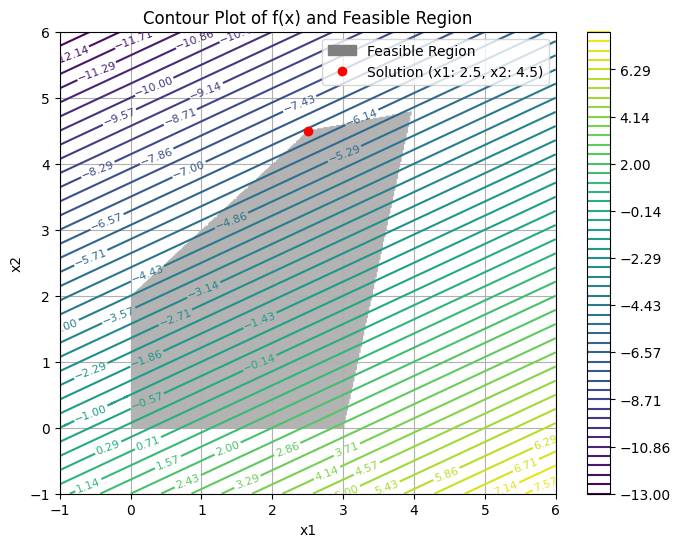

In [19]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the function f(x) = g^T x
def f(x, g):
    return np.dot(g.T, x)

# Define the constraints c(x) = A^T x - b
def c(x, A, b):
    return np.dot(A.T, x) - b

# Given vectors and matrices
g = np.array([1, -2])
A = np.array([[1, 0, 1, 1, -5], [0, 1, -1, -5, 1]])
b = np.array([0, 0, -2, -20, -15])

# Create a meshgrid for the x values
x1 = np.linspace(-1, 6, 400)
x2 = np.linspace(-1, 6, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros(X1.shape)

# Evaluate f(x) over the grid
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        x = np.array([X1[i, j], X2[i, j]])
        Z[i, j] = f(x, g)

# Evaluate constraints and find the feasible region
feasible = np.ones(X1.shape, dtype=bool)
for i in range(A.shape[1]):
    for j in range(X1.shape[0]):
        for k in range(X1.shape[1]):
            x = np.array([X1[j, k], X2[j, k]])
            if c(x, A[:, i:i+1], b[i]) < 0:
                feasible[j, k] = False

# Plotting
plt.figure(figsize=(8, 6))

# Adjust contour levels to improve visibility around zero
levels = np.linspace(Z.min(), Z.max(), 50)  # More uniform distribution of levels
contour = plt.contour(X1, X2, Z, levels=levels)
plt.clabel(contour, inline=True, fontsize=8)

plt.imshow(feasible, extent=(x1.min(), x1.max(), x2.min(), x2.max()), origin='lower', alpha=0.3, cmap='Greys', aspect='auto')

# Plot solution {x1: 5/2, x2: 9/2}
plt.plot(5/2, 9/2, 'ro')

# Create a custom legend for the feasible region
grey_patch = mpatches.Patch(color='grey', label='Feasible Region')
sol_dot = mpl.lines.Line2D([], [], color='red', marker='o', linestyle='None', label="Solution (x1: 2.5, x2: 4.5)") #type: ignore
plt.legend(handles=[grey_patch, sol_dot])


plt.colorbar(contour)
plt.title('Contour Plot of f(x) and Feasible Region')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

## Exercise 3 - Nonlinear Optimization

We consider the equality constrained problem:

$$
\begin{align*}
\begin{array}{ll}
\min _{x \in \mathbb{R}^2} & f(x)=x_1^2+x_2^2+3 x_2 \\
\text { s.t. } & c(x)=x_1^2+\left(x_2+1\right)^2-1=0
\end{array}
\end{align*}
$$

### 3.1 - Contour Plot

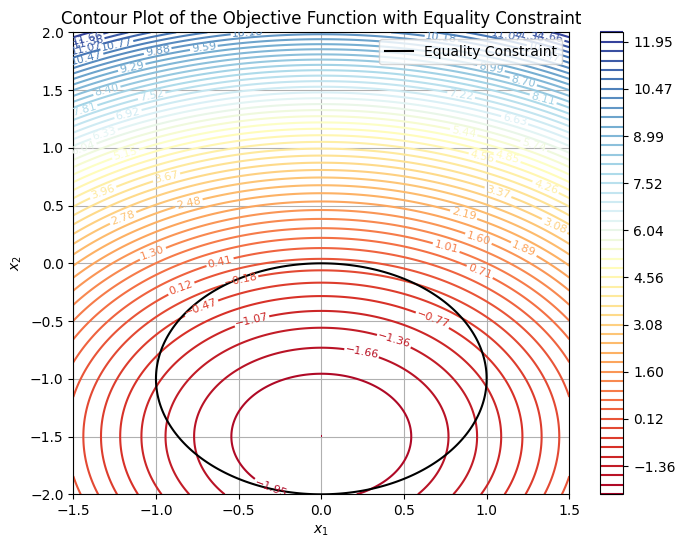

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = x1^2 + x2^2 + 3*x2
def f(x1, x2):
    return x1**2 + x2**2 + 3*x2

# Define the constraint c(x) = x1^2 + (x2+1)^2 - 1 = 0
def c(x1, x2):
    return x1**2 + (x2+1)**2 - 1

# Create a grid of x1 and x2 values
x1 = np.linspace(-1.5, 1.5, 400)
x2 = np.linspace(-2, 2, 400)
X1, X2 = np.meshgrid(x1, x2)
F = f(X1, X2)
C = c(X1, X2)

# Generate contour plot for f(x)
plt.figure(figsize=(8, 6))
contour_levels = np.linspace(F.min(), F.max(), 50)
contour = plt.contour(X1, X2, F, levels=contour_levels, cmap='RdYlBu')
plt.clabel(contour, inline=True, fontsize=8)

# Plot the constraint c(x) = 0
plt.contour(X1, X2, C, levels=[0], colors='black')

# Add labels and title
c_line = mpl.lines.Line2D([], [], color='black',  label="Equality Constraint") #type: ignore
plt.legend(handles=[c_line])
plt.colorbar(contour)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Contour Plot of the Objective Function with Equality Constraint')
plt.grid(True)
plt.show()

### 3.2 - Objective Functions in Feasible Region
Plot the objective functions in the feasible region as function of $x_2$.

/tmp/ipykernel_12992/1781472140.py:11: RuntimeWarning: invalid value encountered in sqrt
  x1_values_positive = np.sqrt(1 - (x2_values + 1)**2)
/tmp/ipykernel_12992/1781472140.py:12: RuntimeWarning: invalid value encountered in sqrt
  x1_values_negative = -np.sqrt(1 - (x2_values + 1)**2)


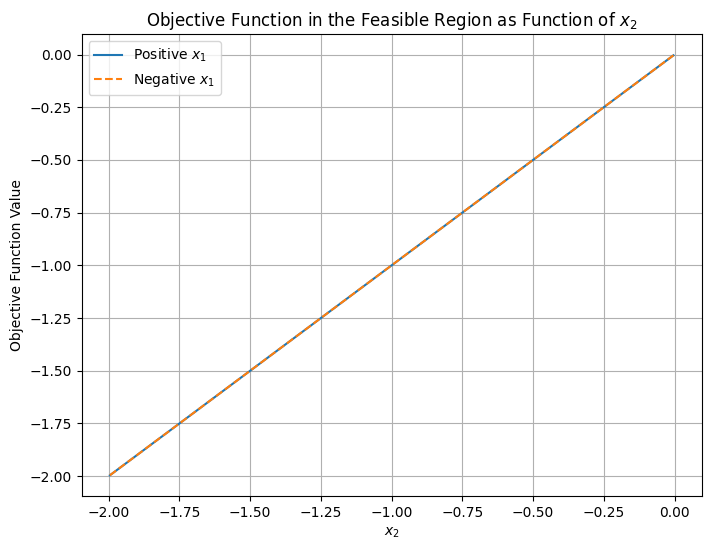

In [39]:
# Solving the constraint equation for x1 as a function of x2
# c(x) = x1^2 + (x2+1)^2 - 1 = 0
# x1^2 = 1 - (x2+1)^2
# x1 = sqrt(1 - (x2+1)^2)

# Define x2 values for plotting
x2_values = np.linspace(-2.5, 0.5, 400) #-2 to 0 seems to be the range of x2 values that satisfy the constraint based on the contour plot

# Calculate corresponding x1 values from the constraint
# Note: We only consider real solutions, so we filter out complex solutions.
x1_values_positive = np.sqrt(1 - (x2_values + 1)**2)
x1_values_negative = -np.sqrt(1 - (x2_values + 1)**2)

# Calculate objective function values for both branches of x1
f_values_positive = f(x1_values_positive, x2_values)
f_values_negative = f(x1_values_negative, x2_values)

# Plotting the objective function in the feasible region as a function of x2
plt.figure(figsize=(8, 6))
plt.plot(x2_values, f_values_positive, label='Positive $x_1$')
plt.plot(x2_values, f_values_negative, label='Negative $x_1$', linestyle='--')

plt.xlabel('$x_2$')
plt.ylabel('Objective Function Value')
plt.title('Objective Function in the Feasible Region as Function of $x_2$')
plt.legend()
plt.grid(True)

plt.show()


### 3.3 - KKT Point

Show that $x=0$ is a KKT point.

**KKT conditions**

$$
\begin{aligned}
& \nabla L(x, \lambda)=\nabla f(x)-\lambda^{\top} \nabla c(x)=0 \\
& c(x)=0
\end{aligned}
$$

We have

$$
\begin{aligned}
& \nabla f(x)=\left[\begin{array}{l}
2 x_{1} \\
2 x_{2}+3
\end{array}\right] \\
& \nabla c(x)=\left[\begin{array}{l}
2 x_{1} \\
2 x_{2}+2
\end{array}\right]
\end{aligned}
$$

So for $x=\left[\begin{array}{l}x_{1} \\ x_{2}\end{array}\right]=\left[\begin{array}{l}0 \\ 0\end{array}\right]$ we get

$$
\nabla f(x)-\lambda^{\top} \nabla c(x)=\left[\begin{array}{l}
0 \\
3
\end{array}\right]-\left[\begin{array}{c}
0 \\
2 \lambda_{2}
\end{array}\right]
$$

Which is equal to 0 for $\lambda_{2}=\frac{3}{2}$.

For the constraint we get

$$
c(x)=0^{2}+(0+1)^{2}-1=0
$$

Which shows that the st order optimality (KKT) Conditions are fulfilled.



### 3.4 - Lagrange Multiplier
As shown above the Lagrange multiplier at 0 is positive, as $\lambda_2 = \frac{3}{2}$ and $\lambda_1$ can be anything since $x_1 = 0$.

### 3.5 - Positive Definite Hessian

The Hessian is defined as:

$$
\frac{d^2f}{dx^2}(0) = 
\begin{bmatrix}
    2 & 0 \\
    0 & 2
\end{bmatrix}
$$
So the matrix has eigenvalue 2 with multiplicity 2, which means that all eigenvalues are real and positive.

As such, the matrix is positive definite.

### 3.6 - Not a Local Minimizer

For $0$ to be a local minimizer of the problem it should be the case that:

$$
f(x) \geq f\left(0\right) \quad \forall x:\left\|x-0\right\| \leq \varepsilon, \varepsilon>0
$$

An example could be:

$$
x = 
\begin{bmatrix}
    0.5 \\
    -0.5
\end{bmatrix}
\text{ and }
\varepsilon = 0.5
$$

Where
$$
f(x) = 0.25 + 0.25 - 1.5 = -1 < f(0) = 0
$$

### 3.7 - Minimizer

In [41]:
import sympy as sp

x1, x2, lambda1 = sp.symbols('x1 x2 lambda1')

eq1 = sp.Eq(2*x1 - 2*lambda1*x1, 0)
eq2 = sp.Eq(2*x2 - 2*lambda1*x2 - 2*lambda1+3, 0)
eq3 = sp.Eq(x1**2 + (x2 + 1)**2 - 1, 0)

solution = sp.solve((eq1, eq2, eq3), (x1, x2, lambda1), dict=True)
solution

[{lambda1: 1/2, x1: 0, x2: -2}, {lambda1: 3/2, x1: 0, x2: 0}]

If we look at the contour plot we see that the minimizer is:

{lambda1: 1/2, x1: 0, x2: -2}